In [3]:
%config IPCompleter.greedy=True

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import pandas as pd

In [9]:
cricket=pd.read_csv('Cricket.csv', encoding="ISO-8859-1")
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [29]:
df=cricket[['Player','SR','Ave']]
df.shape

(79, 3)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
numeric_df=df.copy()
s_scalar=StandardScaler(copy=True)
numeric_df[['SR','Ave']]=s_scalar.fit_transform(numeric_df[['SR','Ave']])
numeric_df


,Player,SR,Ave
0,SR Tendulkar (INDIA),0.703152,1.072294
1,KC Sangakkara (Asia/ICC/SL),-0.044139,0.587725
2,RT Ponting (AUS/ICC),0.110997,0.596226
3,ST Jayasuriya (Asia/SL),1.207091,-1.047909
4,DPMD Jayawardene (Asia/SL),-0.034000,-0.876185
5,Inzamam-ul-Haq (Asia/PAK),-0.512591,0.169465
6,JH Kallis (Afr/ICC/SA),-0.649476,0.992383
7,SC Ganguly (Asia/INDIA),-0.567345,0.424501
8,R Dravid (Asia/ICC/INDIA),-0.816780,0.108256
9,BC Lara (ICC/WI),0.021768,0.332688


In [46]:
kmeans = KMeans(n_clusters=4).fit(numeric_df[['SR','Ave']])

In [49]:
kmeans.labels_

array([1, 2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 3, 1, 0, 1, 0, 3, 2, 2, 3, 2, 0,
       2, 3, 1, 0, 3, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 2, 1, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 3, 0])

In [50]:
cricket_cluster = pd.concat([numeric_df, pd.Series(kmeans.labels_)], axis=1)

In [52]:
cricket_cluster.rename(columns={0:'cluster_id'},inplace=True)

In [55]:
cricket_cluster[cricket_cluster['cluster_id']==1]

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),0.703152,1.072294,1
13,MS Dhoni (Asia/INDIA),0.952587,2.175752,1
15,AB de Villiers (Afr/SA),2.124728,2.554906,1
25,V Kohli (INDIA),1.185798,2.621216,1
34,HM Amla (SA),0.989089,1.993826,1
38,MG Bevan (AUS),-0.520702,2.560007,1
42,IVA Richards (WI),1.105695,1.441247,1
63,MJ Guptill (NZ),0.855246,0.812157,1
64,MEK Hussey (AUS),0.797450,1.636775,1


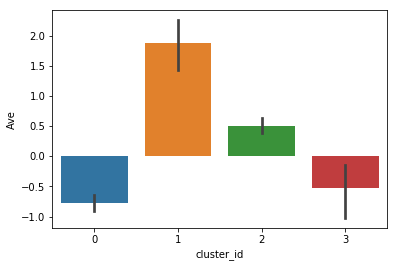

In [58]:
%matplotlib inline
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.Ave)

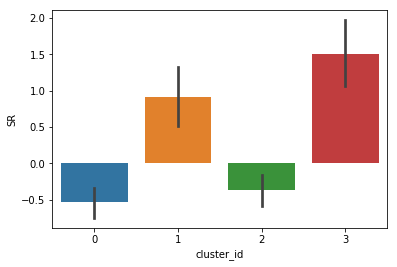

In [59]:
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.SR)